In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import *

Define some nonlinearities

In [3]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [4]:
def relu(x):
    return (x > 0)*x

For this notebook, we define our nonlinearity as $f := \frac{1}{1+e^{-x}}$

In [5]:
f = sigmoid

## One input, one output, one layer, width = 1

### Explore cost

This simplest case neural net has one input $x$ and one output $y$. In functional notation we have $ y = f(ax + b) $

In [6]:
def forward(a,b,x):
    return f(a*x + b)

In [7]:
forward(0.01, 0, 1)

0.50249997916687494

In [86]:
x = np.linspace(-1,1,100)
y_line = np.linspace(.4,.6,100)
y_heaviside = np.concatenate((np.zeros(50), np.ones(50)))

In [90]:
def cost(y_actual, y_predicted):
    return np.sum(np.abs(y_predicted - y_actual))

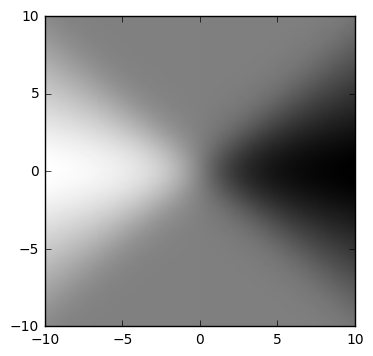

In [91]:
phi_a = np.linspace(-10,10,100)
phi_b = np.linspace(-10,10,100)
A,B = np.meshgrid(phi_a, phi_b)

Z = np.vectorize(lambda a,b: cost(y_heaviside, forward(a,b,x)))(A,B)
plt.imshow(Z, extent=[-10, 10, -10, 10], cmap="gray")

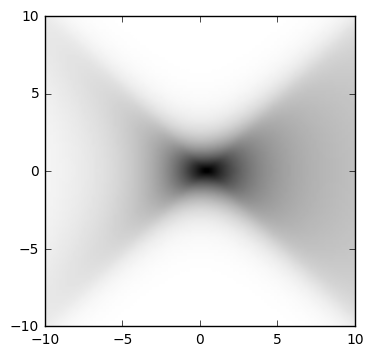

In [92]:
phi_a = np.linspace(-10,10,100)
phi_b = np.linspace(-10,10,100)
A,B = np.meshgrid(phi_a, phi_b)

Z = np.vectorize(lambda a,b: cost(y_line, forward(a,b,x)))(A,B)
plt.imshow(Z, extent=[-10, 10, -10, 10], cmap="gray")

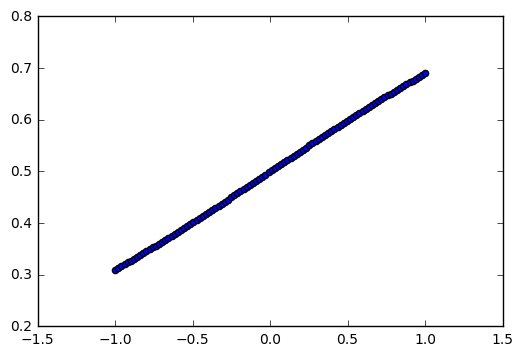

In [62]:
x = np.linspace(-10,10,100)

def plot_forward(a=0,b=0):
    plt.scatter(x, forward(a,b,x))

interact(plot_forward, a=(-10,10,0.1), b=(-10,10,0.1))

## One input, one output, two layer, width = 1